In [1]:
import numpy as np

from scipy.signal import convolve2d

from imageio import imread

import matplotlib.pyplot as plt

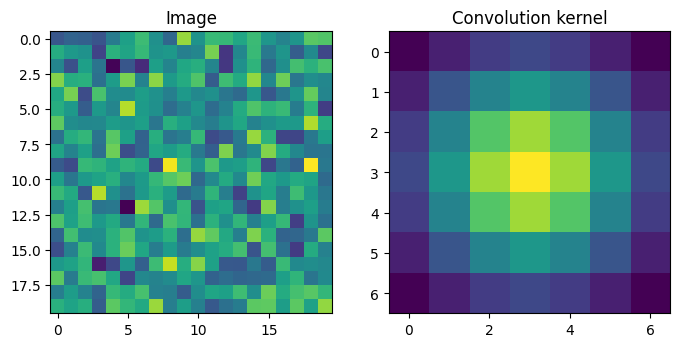

In [3]:
imgN = 20
image = np.random.randn(imgN, imgN)

kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel = np.exp(-(X**2+Y**2)/7)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

plt.show()

In [5]:
conv_output = np.zeros((imgN, imgN))
half_kernel = kernelN//2

for row_idx in range(half_kernel, imgN-half_kernel):
    for col_idx in range(half_kernel, imgN-half_kernel):
        
        piece_of_img = image[row_idx-half_kernel:row_idx+half_kernel+1, :]
        piece_of_img = piece_of_img[:, col_idx-half_kernel:col_idx+half_kernel+1]
        
        dot_prod = np.sum(piece_of_img * kernel[::-1, ::-1])
        
        conv_output[row_idx, col_idx] = dot_prod

In [6]:
conv_output_2 = convolve2d(image, kernel, mode='valid')

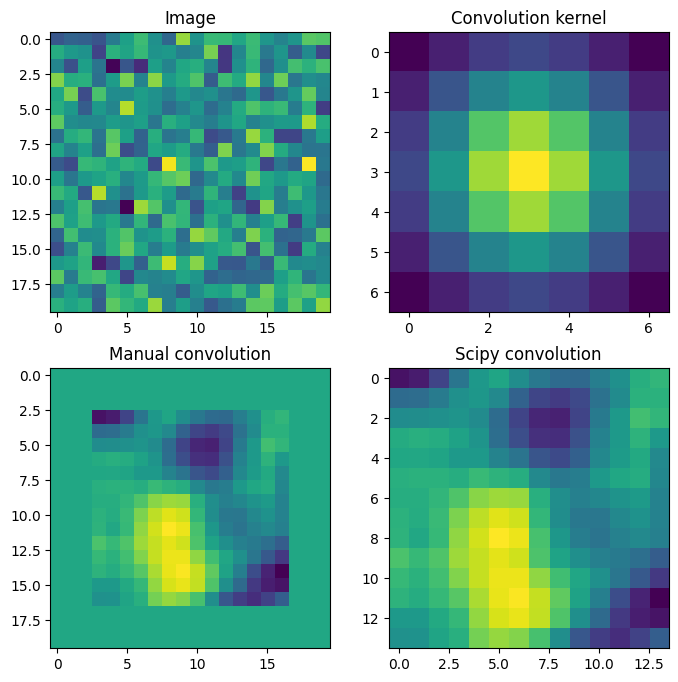

In [7]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(conv_output)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(conv_output_2)
ax[1,1].set_title('Scipy convolution')

plt.show()

/tmp/ipykernel_29276/2203222015.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')


(1675, 3000, 3)
(1675, 3000)


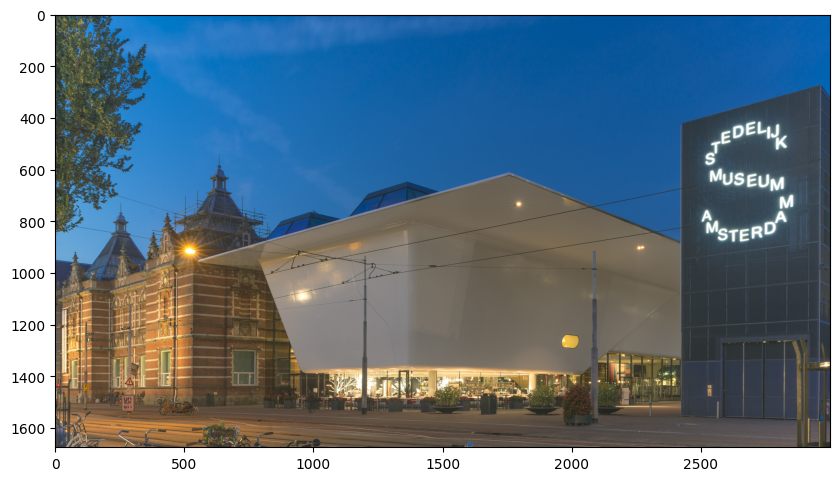

In [8]:
bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

print(bathtub.shape)

fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub);

bathtub = np.mean(bathtub, axis=2)
bathtub = bathtub/np.max(bathtub)

print(bathtub.shape)

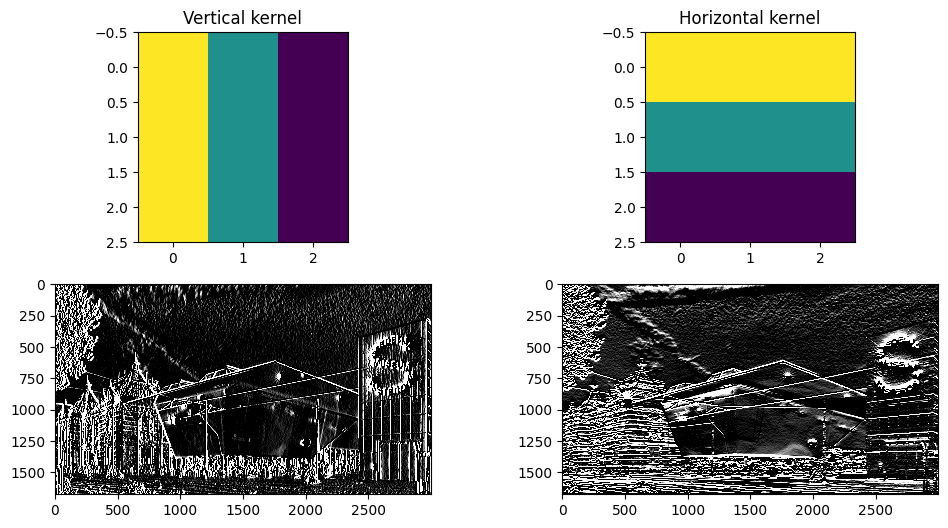

In [19]:
VK = np.array([[1,0,-1],
               [1,0,-1],
               [1,0,-1]])

HK = np.array([[1,1,1],
               [0,0,0],
               [-1,-1,-1]])

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')

conv_res = convolve2d(bathtub, VK, mode='same')

ax[1,0].imshow(conv_res, cmap='gray', vmin=0, vmax=.01)

conv_res = convolve2d(bathtub, HK, mode='same')

ax[1,1].imshow(conv_res, cmap='gray', vmin=0, vmax=.01)

plt.show()

In [10]:
import torch
import torch.nn.functional as F

VK_t = torch.tensor(VK).view(1,1,3,3).double()
HK_t = torch.tensor(HK).view(1,1,3,3).double()

bathtub_t = torch.tensor(bathtub).view(1,1,bathtub.shape[0], bathtub.shape[1])

print(VK_t.shape)
print(bathtub_t.shape)

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1675, 3000])


In [11]:
C = F.conv2d(bathtub_t, VK_t)
print(C.shape)

torch.Size([1, 1, 1673, 2998])


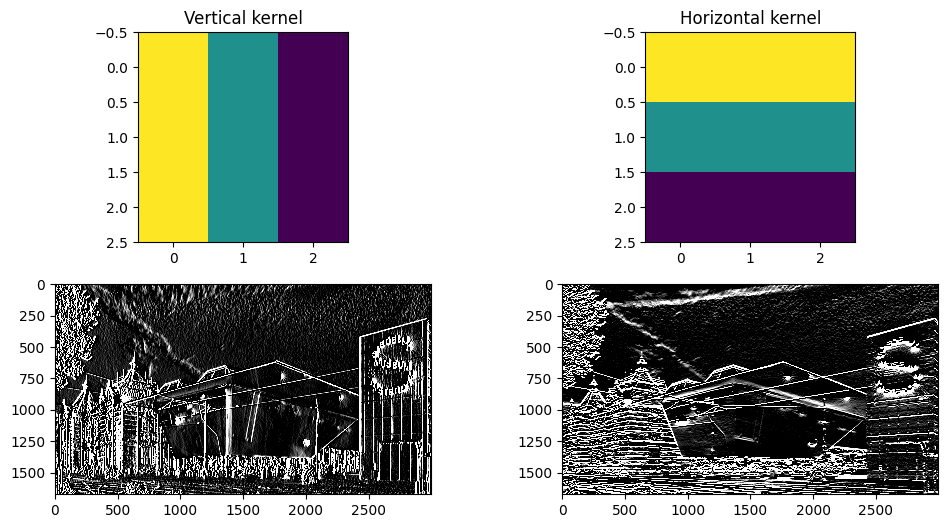

In [13]:
fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')

conv_res = F.conv2d(bathtub_t, VK_t)
img = torch.squeeze(conv_res.detach())

ax[1,0].imshow(img, cmap='gray', vmin=0, vmax=.01)

conv_res = F.conv2d(bathtub_t, HK_t)
img = torch.squeeze(conv_res.detach())

ax[1,1].imshow(img, cmap='gray', vmin=0, vmax=.01)

plt.show()